<h1> Data Preprocessing</h1>

## Library Imports

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Data Imports

In [58]:
data=pd.read_csv('mail_data.csv')

## EDA (Exploratory Data Analysis)

In [59]:
data.shape

(5572, 2)

In [60]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [62]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


## Handling Missing Value

In [63]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [64]:
data['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [65]:
data = data.dropna()

## Feature Engineering

In [66]:
vectorizer = CountVectorizer()

In [67]:
X = vectorizer.fit_transform(data['Message'])

In [68]:
data['Category'] = data['Category'].map({'spam': 1, 'ham': 0})
y =data['Category']

## Handling Outlier

## Data Visualization

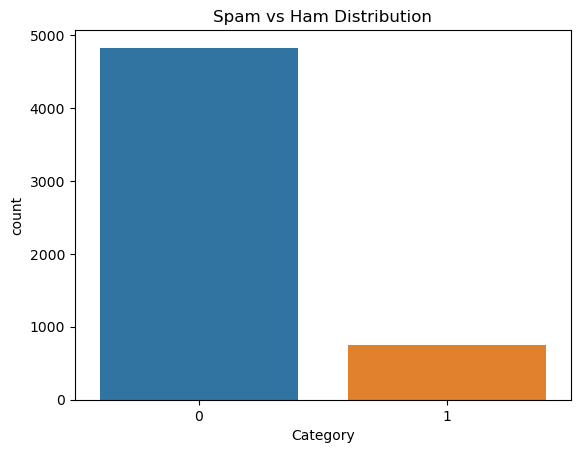

In [69]:
sns.countplot(x='Category', data=data)
plt.title('Spam vs Ham Distribution')
plt.show()


# Model Building

## Train Test Split 

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Initalization

In [72]:
model = MultinomialNB()

## Model Training

In [73]:
model.fit(X_train, y_train)

MultinomialNB()

## Hyper Parameter Tuining

# Evaluation and Result

In [75]:
y_pred = model.predict(X_test)

In [76]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9856502242152466


In [77]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[957   9]
 [  7 142]]


In [78]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



# Error

# Research